### Importing libraries

In [2]:
# Importe la bibliothèque pandas avec l'alias 'pd'
import pandas as pd 
# Importe la bibliothèque numpy avec l'alias 'np'
import numpy as np 
# Importe la sous-bibliothèque 'pyplot' de matplotlib avec l'alias 'plt'
import matplotlib.pyplot as plt 
# Importe la bibliothèque seaborn avec l'alias 'sns'
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
dataset=pd.read_csv('50_Startups.csv')

In [5]:
dataset.shape

(50, 5)

In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:ylabel='None'>

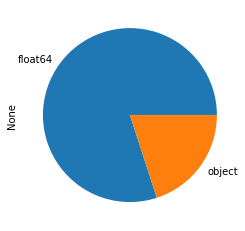

In [9]:
# Compte le nombre de colonnes de chaque type de données dans le DataFrame et crée un diagramme circulaire
dataset.dtypes.value_counts().plot.pie()

### BoxPlot

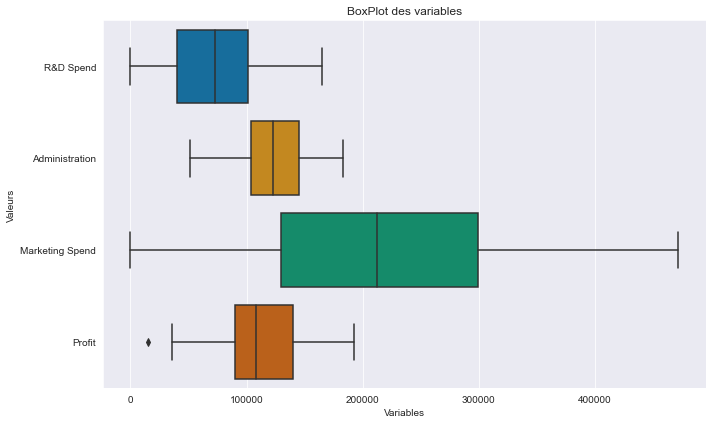

In [10]:
# Définition du style de la grille
sns.set_style("darkgrid")

# Création d'une figure avec une taille spécifique
plt.figure(figsize=(10, 6))

# Création du boxplot en utilisant Seaborn
sns.boxplot(data=dataset, palette="colorblind", orient='h')

# Ajout d'un titre au graphique
plt.title("BoxPlot des variables")

# Ajout de labels pour les axes x et y
plt.xlabel("Variables")
plt.ylabel("Valeurs")

# Ajustement de la disposition du graphique pour éviter les chevauchements
plt.tight_layout()

# Affichage du graphique
plt.show()

## Encodage

#### ° One hot

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
#generate summary statistics for the categorical columns of the dataset.
dataset.describe(include="object")

,State
count,50
unique,3
top,New York
freq,17


In [13]:
x1=dataset.iloc[:,0:4].values # first 4 columns of the dataset as a numpy array
y1=dataset.iloc[:,4].values # the values from the 5th column

In [14]:
#This code applies one-hot encoding
ct=ColumnTransformer([('State',OneHotEncoder(),[3])],\
                    remainder='passthrough')
x1=ct.fit_transform(x1)

In [15]:
x1=x1[:,1:]

In [16]:
x1.shape

(50, 5)

In [17]:
x1[0,:]

array([0.0, 1.0, 165349.2, 136897.8, 471784.1], dtype=object)

In [18]:
x1[:5,:]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

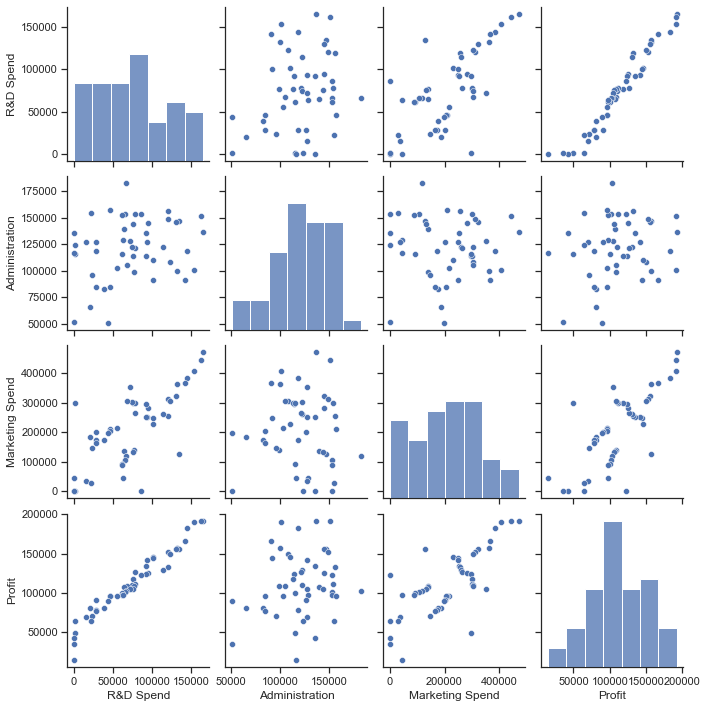

In [19]:
# Définition du style de la grille
sns.set(style="ticks")

# Création d'une grille de paires pour visualiser les relations entre les variables numériques
sns.pairplot(dataset)

# Affichage de la grille de paires
plt.show()

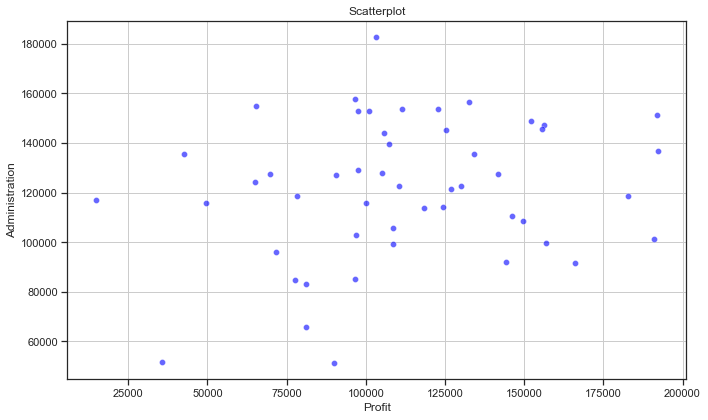

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Administration', data=dataset, color='blue', alpha=0.6)
plt.title("Scatterplot")
plt.xlabel("Profit")
plt.ylabel("Administration")
plt.grid(True)
plt.tight_layout()
plt.show()

=> On remarque qu'une faible corrélation entre les deux variables.

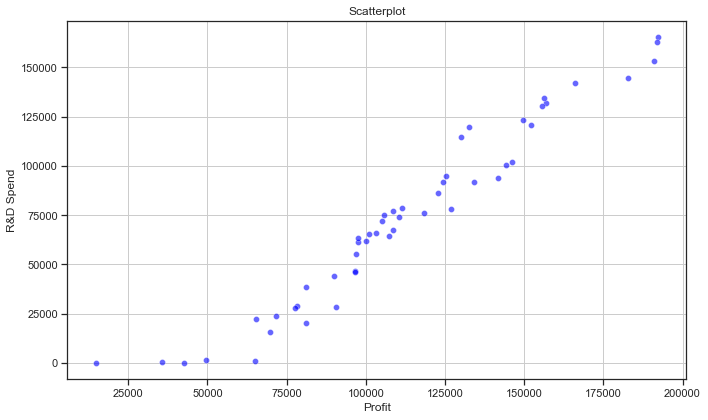

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='R&D Spend', data=dataset, color='blue', alpha=0.6)
plt.title("Scatterplot")
plt.xlabel("Profit")
plt.ylabel("R&D Spend")
plt.grid(True)
plt.tight_layout()
plt.show()

=> Ici Il y'a yne forte corrélation entre les deux variables

<AxesSubplot:>

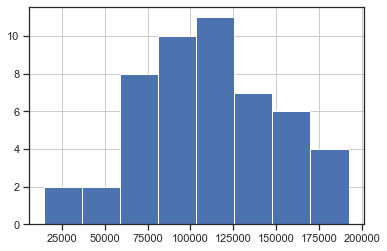

In [22]:
# Crée un histogramme des valeurs de la colonne 'Profit' avec 8 intervalles
dataset.Profit.hist(bins=8)

### histogramme

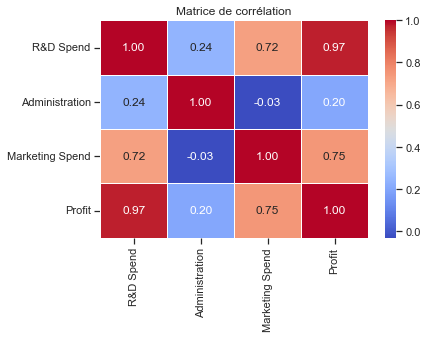

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [23]:
# Calcul de la matrice de corrélation des variables
correlation_matrix = dataset.corr()

# Création d'une carte de chaleur pour visualiser la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajout d'un titre à la carte de chaleur
plt.title("Matrice de corrélation")

# Affichage de la carte de chaleur
plt.show()

# Affichage de la matrice de corrélation (optionnel)
correlation_matrix

In [24]:
print(dataset['Administration'].kurtosis())
print(dataset['Administration'].skew())

0.22507113536865386
-0.4890248099671768


In [25]:
print(dataset['Profit'].kurtosis())
print(dataset['Profit'].skew())

-0.06385888546853113
0.023291019769116614


## Model training

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [27]:
x_test[0,:]

array([1.0, 0.0, 66051.52, 182645.56, 118148.2], dtype=object)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
y_pred

array([103015.20159797, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [32]:
regressor.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [33]:
regressor.intercept_

42554.167617736515

In [34]:
y_pred = regressor.predict(x_test)

In [35]:
y_pred

array([103015.20159797, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [36]:
x_test[0]

array([1.0, 0.0, 66051.52, 182645.56, 118148.2], dtype=object)

In [37]:
ypred1=42554.16761772438-9.59284160e+02+7.73467193e-01*66051.52+3.28845975e-02*182645.56+3.66100259e-02*118148.2
ypred1

103015.2016133082

In [38]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [39]:
for i in range(10):
    print([y_test[i],y_pred[i]])

[103282.38, 103015.201597967]
[144259.4, 132582.27760815158]
[146121.95, 132447.7384517456]
[77798.83, 71976.09851258327]
[191050.39, 178537.4822105455]
[105008.31, 116161.2423016477]
[81229.06, 67851.69209675798]
[97483.56, 98791.7337468782]
[110352.25, 113969.43533012434]
[166187.94, 167921.06569550032]


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Calcul de l'erreur quadratique moyenne entre les valeurs réelles et prédites
mse = mean_squared_error(y_test, y_pred)

# Affichage de l'erreur quadratique moyenne
print("MSE =", mse)

MSE = 83502864.03257987


In [43]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [44]:
print ("RMSE= ",rmse(y_test, y_pred))

RMSE=  9137.99015279508


In [45]:
print ("MAE= ",mean_absolute_error(y_test,y_pred))

MAE=  7514.293659639967


In [46]:
print ("R²= ",r2_score(y_pred,y_test))

R²=  0.9293749209317973


In [47]:
y_pred_t=regressor.predict(x_train)

In [48]:
print ("R²= ",r2_score(y_pred_t,y_train))

R²=  0.9475731045123188


In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [50]:
y_pred_r = ridge.predict(x_test)

In [51]:
ridge.intercept_

42580.967043520825

In [52]:
ridge.coef_

array([-8.55246577e+02,  6.60540602e+02,  7.73903697e-01,  3.25917542e-02,
        3.64400165e-02])

In [53]:
print ("R²= ",r2_score(y_pred_r,y_test))

R²=  0.9299981254397198


In [54]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [55]:
lasso.intercept_

42556.0912268821

In [56]:
lasso.coef_

array([-9.54987452e+02,  6.96280765e+02,  7.73491090e-01,  3.28690539e-02,
        3.66015591e-02])

In [57]:
l_y_pred = lasso.predict(x_test)

In [58]:
print ("R²= ",r2_score(l_y_pred,y_test))

R²=  0.9294075315664558


In [63]:
#utiliser le module statsmodels.api pour effectuer des analyses statistiques
import statsmodels.api as sm

In [64]:
x1.shape

(50, 6)

In [65]:
x1[0:5,:]

array([[1.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [66]:
x1 = np.append(arr = np.ones((50,1)), values = x1, axis = 1)

In [67]:
x1.shape

(50, 7)

In [68]:
x1[0:5,:]

array([[1.0, 1.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 1.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1.0, 1.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 1.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [69]:
x1=x1.astype('float64')

In [70]:
x_opt = x1[:,[0,1,2,3,4,5]]

In [71]:
reg_OLS = sm.OLS(endog = y1,exog = x_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.90e-28
Time:                        00:20:59   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.73e+04   3185.530      8.571      0.000    2.09e+04    3.37e+04
x1           2.73e+04   3185.530      8.571      0.000    2.09e+04    3.37e+04
x2          1091.1075   3377.087      0.323      0.748   -5710.695    7892.910
x3           -39.3434   3309.047     -0.012      0.991   -6704.106    6625.420
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     4.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.03e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
x_opt = x1[:,[0,1,3,4,5]]
reg_OLS = sm.OLS(endog = y1,exog = x_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.68e-29
Time:                        00:20:59   Log-Likelihood:                -526.81
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.753e+04   3072.973      8.960      0.000    2.13e+04    3.37e+04
x1          2.753e+04   3072.973      8.960      0.000    2.13e+04    3.37e+04
x2          -573.7029   2838.043     -0.202      0.841   -6286.386    5138.981
x3             0.8624      0.030     28.282      0.000       0.801       0.924
x4            -0.0530      0.050     -1.063      0.294      -0.154       0.047
==============================================================================
Omnibus:                       14.902   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.212
Skew:                          -0.964   Prob(JB):                     2.48e-05
Kurtosis:                       5.543   Cond. No.                     6.88e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
x_opt = x1[:,[0,3,4,5]]
reg_OLS = sm.OLS(endog = y1,exog = x_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.68e-29
Time:                        00:20:59   Log-Likelihood:                -526.81
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.507e+04   6145.947      8.960      0.000    4.27e+04    6.74e+04
x1          -573.7029   2838.043     -0.202      0.841   -6286.386    5138.981
x2             0.8624      0.030     28.282      0.000       0.801       0.924
x3            -0.0530      0.050     -1.063      0.294      -0.154       0.047
==============================================================================
Omnibus:                       14.902   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.212
Skew:                          -0.964   Prob(JB):                     2.48e-05
Kurtosis:                       5.543   Cond. No.                     6.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
x_opt = x1[:,[0,3,5]]
reg_OLS = sm.OLS(endog = y1,exog = x_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.372
Time:                        00:20:59   Log-Likelihood:                -599.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.613e+04   2.59e+04      2.942      0.005    2.41e+04    1.28e+05
x1          2555.2116    1.2e+04      0.212      0.833   -2.16e+04    2.68e+04
x2             0.2885      0.205      1.404      0.167      -0.125       0.702
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.139
Skew:                           0.099   Prob(JB):                        0.933
Kurtosis:                       2.835   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
x_opt = x1[:,[0,3]]
reg_OLS = sm.OLS(endog = y1,exog = x_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.829
Time:                        00:20:59   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
x1          2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""